In [ ]:
"""
Author: Aditya Goel 400414715, MEST'21, McMaster University
SEP786: Machine Learning Fundamentals
Assignment 2 - Question 1 and 2a
References: 
1. Dr. Jeff Fortuna's SEP 786 Lecture Notes
2. https://scikit-learn.org/
"""

"\nAuthor: Aditya Goel 400414715, MEST'21, McMaster University\nSEP786: Machine Learning Fundamentals\nAssignment 2 - Question 2a\nReferences: \n1. Dr. Jeff Fortuna's SEP 786 Lecture Notes\n2. https://scikit-learn.org/\n"

**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Initialise Mean and Cov Matrix**

In [ ]:
mean1 = np.array([-5,-4,-3,-2,-1,1,2,3,4,5])
mean2 = np.array([-10,-8,-6,-4,-2,2,4,6,8,10])
cov = np.matrix([[5,0.1,0,0,0,0,0,0,0,0], [0.1,5,0,0,0,0,0,0,0,0], [0,0,5,0,0,0,0,0,0,0], 
                  [0,0,0,5,0,0,0,0,0,0], [0,0,0,0,5,0.3,0,0,0,0], [0,0,0,0,0.3,5,0,0,0,0],
                  [0,0,0,0,0,0,5,0,0,0], [0,0,0,0,0,0,0,5,0,0], [0,0,0,0,0,0,0,0,5,0.2],
                  [0,0,0,0,0,0,0,0,0.2,5]])
print(cov)

[[5.  0.1 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.1 5.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  5.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  5.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  5.  0.3 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.3 5.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  5.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  5.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  5.  0.2]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.2 5. ]]


**Generate Data**

In [ ]:
X1 = np.random.multivariate_normal(mean1, cov, 1000)
X2 = np.random.multivariate_normal(mean2, cov, 1000)

#Mean subtract the data
Xms1 = X1 - mean1
Xms2 = X2 - mean2

Xc = np.concatenate((Xms1,Xms2))

print(Xc.shape)

(2000, 10)


**Applying EVD**

In [ ]:
D, E = np.linalg.eig(np.dot(Xc.T,Xc)/(Xc.shape[0]-1))                           #Compute EVD
sortIndex = np.argsort(D)[::-1]                                                 #Reverse sort D
sortedE = E[:,sortIndex]                                                        #Sort E correspondingly

Y = np.dot(Xc,sortedE)                                                          #Obtain Transformation
print(sortedE.shape)
print(Y.shape)

(10, 10)
(2000, 10)


**PCA**

In [ ]:
def compute_score(pc):
  newE = sortedE[:,:pc]                                                         #Selecting Principal Components in a decresing way i.e. from 10 to 5
  Ynew = np.dot(Xc, newE)

  return [Ynew, newE]                                                           #Obtain Eigen-Vector submatrix E and Corresponding transformation Matrix Y

**Reconstruction**

In [ ]:
def reconstruct(Ynew, newE):
  Xc_hat = np.dot(Ynew, newE.T)                                                 # X_hat = Y.E_transpose

  X1_rec = Xc_hat[:1000,:] + mean1                                              #Adding the means to complete the reconstruction
  X2_rec = Xc_hat[1000:2000,:] + mean2

  Xc_rec = np.concatenate((X1_rec, X2_rec))

  return Xc_rec

**Error**

In [ ]:
def error(Xc_rec, Xc):
  X = Xc_rec - Xc
  err = (np.square(Xc_rec - Xc)).mean(axis=None)
  print("The corresponding error is: ", err)
  return err

**Main Function**


The number of PCs are:  10
The corresponding error is:  27.5

The number of PCs are:  9
The corresponding error is:  27.952455410255794

The number of PCs are:  8
The corresponding error is:  28.410128003943154

The number of PCs are:  7
The corresponding error is:  28.842348868823272

The number of PCs are:  6
The corresponding error is:  29.32508486813426

The number of PCs are:  5
The corresponding error is:  29.80274327764869


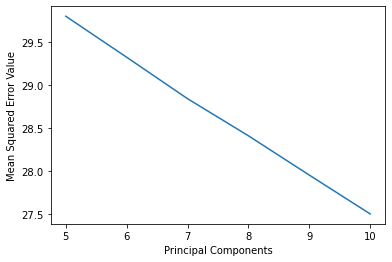

In [ ]:
error_matrix = []
pc_matrix = []

for pc in reversed(range(5,11)):
  print("\nThe number of PCs are: ", pc)
  [Ynew, newE] = compute_score(pc)
  Xc_rec = reconstruct(Ynew, newE)
  error_value = error(Xc_rec, Xc)
  
  error_matrix.append(error_value)
  pc_matrix.append(pc)

plt.plot(pc_matrix, error_matrix)
plt.xlabel("Principal Components")
plt.ylabel("Mean Squared Error Value")
plt.show()